## Import Libraries and Data

In [59]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [60]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [61]:
path = r'C:\Users\ACER NITRO\Documents\Boat_dataset'

In [62]:
df = pd.read_csv(os.path.join(path, 'boat_clean.csv'))

In [63]:
df.head()

,Unnamed: 0,Price,Currency,Euro_Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,1,3490,EUR,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,3,3399,EUR,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,7,3500,CHF,3500.0,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239
3,8,3500,EUR,4000.0,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,9,4600,CHF,3999.0,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


## Step 3 - Create Correlation Matrix Heatmap

In [64]:
df_sub = df [['Euro_Price','Year Built','Length','Width','Number of views last 7 days']]

## Exploring relationships

In [65]:
# Create a correlation matrix using pandas

df_sub.corr()

,Euro_Price,Year Built,Length,Width,Number of views last 7 days
Euro_Price,1.000000,0.076569,0.288262,0.284343,-0.090806
Year Built,0.076569,1.000000,-0.092549,-0.083407,-0.194199
Length,0.288262,-0.092549,1.000000,0.922257,-0.167606
Width,0.284343,-0.083407,0.922257,1.000000,-0.183797
Number of views last 7 days,-0.090806,-0.194199,-0.167606,-0.183797,1.000000


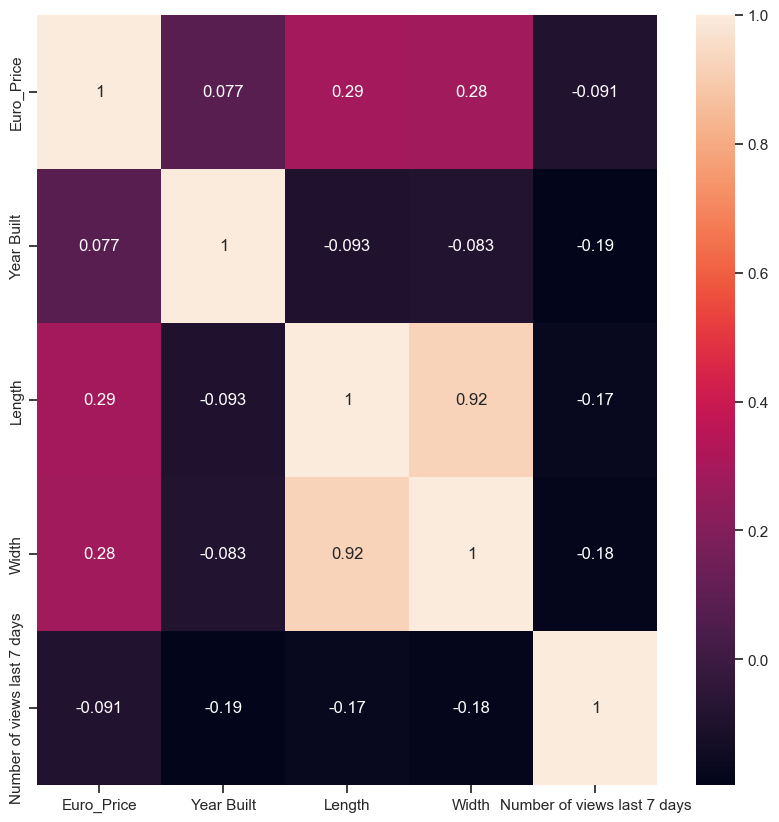

In [66]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn 
corr_map = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

There are not any particularly strong correlations between these variables - The strongest coorelation is between 'length' and 'width' followed by 'Euro_price' and 'length' as well as 'Euro_price' and 'width'. The next stronger correlation is the negative correlation between 'Euro_price' and 'Number of views last 7 days'.

## Step 4: Create a scatterplot

C:\Users\ACER NITRO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


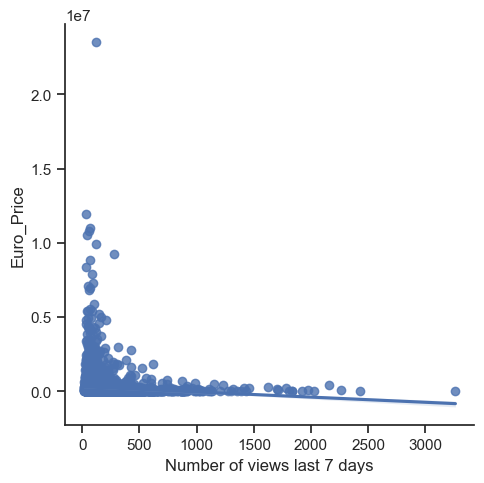

In [67]:
sns.lmplot(x = 'Number of views last 7 days', y = 'Euro_Price', data = df_sub)

The scatter plot looks skiewed .

C:\Users\ACER NITRO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


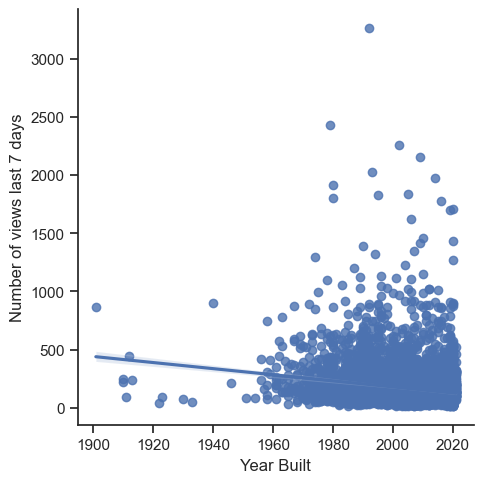

In [69]:
sns.lmplot(x = 'Year Built', y = 'Number of views last 7 days', data = df_sub)

we can see, The number of views are more in the recent years.

## Step 5: pair plot

C:\Users\ACER NITRO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


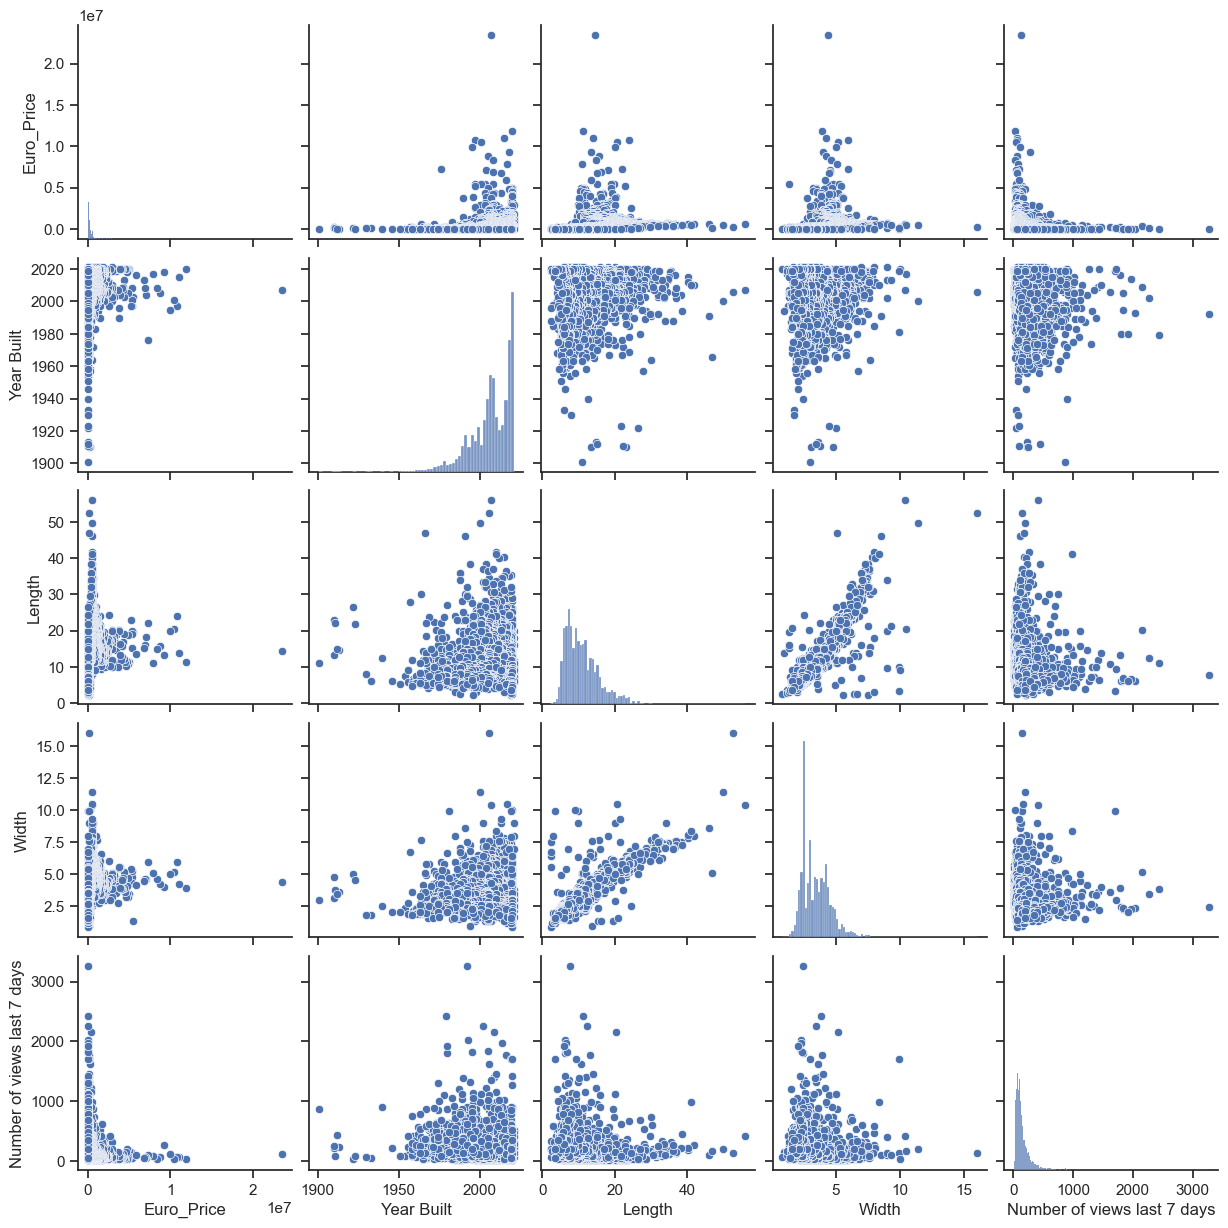

In [72]:
# Create a pair plot of entire dataset
g = sns.pairplot(df_sub)

There seems to be correlations between the year built and the price, The size of the boat and the price, and The boats viewed and the price.

## Step 6 Create a categorical plot

<Axes: xlabel='Euro_Price', ylabel='Count'>

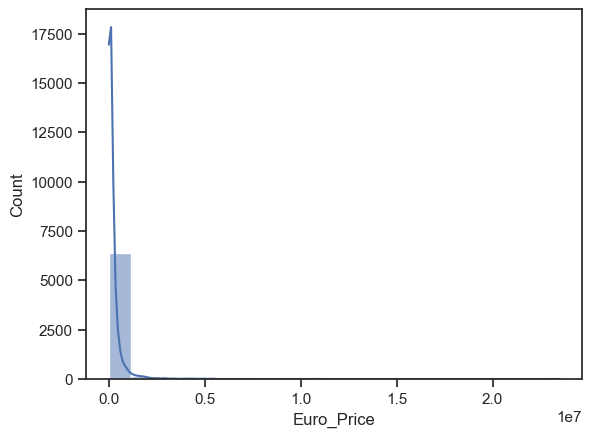

In [74]:
#See the distribution of boat price
sns.histplot(df['Euro_Price'], bins = 20, kde = True)

In [92]:
df.loc[df['Euro_Price'] < 100000, 'Price category'] = 'Low price'

In [93]:
df.loc[(df['Euro_Price'] >= 100000) & (df['Euro_Price'] < 1000000), 'Price category'] = 'Middle price'

In [94]:
df.loc[df['Euro_Price'] >= 1000000, 'Price category'] = 'High price'

In [95]:
df['Price category'].value_counts(dropna = False)

Price category
Low price       3859
Middle price    2508
High price       240
Name: count, dtype: int64

C:\Users\ACER NITRO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


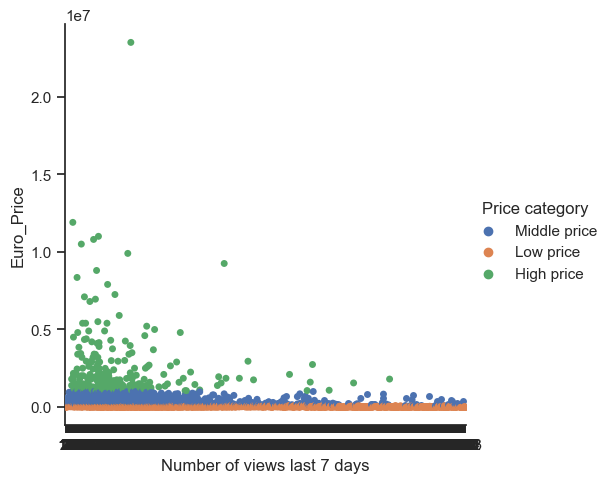

In [96]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Number of views last 7 days", y="Euro_Price", hue="Price category", data=df)

In [ ]:
If the price of the boat is low then, the number of views are more.

## Hypothesis
1. Plastic boats are the most affordable boats on the market with the highest popularity.
2. The bigger the boat the higher price of the boat